## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


%matplotlib inline

pd.set_option("display.max_columns", 50)
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_pitching = pd.read_csv("Pitching.csv")
raw_pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [3]:
raw_pitching.drop([42108], inplace = True)

In [4]:
raw_pitching.iloc[42108]

playerID    gonzaed01
yearID           2013
stint               1
teamID            TOR
lgID               AL
W                   0
L                   0
G                   3
GS                  0
CG                  0
SHO                 0
SV                  0
IPouts             24
H                   9
ER                  7
HR                  2
BB                  5
SO                  3
BAOpp           0.281
ERA              7.88
IBB                 0
WP                  0
HBP                 1
BK                  0
BFP                38
GF                  1
R                   7
SH                  0
SF                  0
GIDP                0
Name: 42109, dtype: object

In [5]:
pitching = raw_pitching[(raw_pitching.yearID >= 2008) & (raw_pitching.yearID <= 2019)]

display(pitching.head())

print(pitching.shape)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
38320,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
38321,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0
38322,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0
38323,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0
38324,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0


(9307, 30)


In [6]:
null_vals = pitching.isna().sum()
print("Percent of missing data: \n\n", null_vals / len(pitching))

Percent of missing data: 

 playerID    0.000000
yearID      0.000000
stint       0.000000
teamID      0.000000
lgID        0.000000
W           0.000000
L           0.000000
G           0.000000
GS          0.000000
CG          0.000000
SHO         0.000000
SV          0.000000
IPouts      0.000000
H           0.000000
ER          0.000000
HR          0.000000
BB          0.000000
SO          0.000000
BAOpp       0.000645
ERA         0.001289
IBB         0.000000
WP          0.000000
HBP         0.000000
BK          0.000000
BFP         0.000000
GF          0.000000
R           0.000000
SH          0.000000
SF          0.000000
GIDP        0.000000
dtype: float64


In [7]:
pitching.dropna(inplace = True)

In [8]:
pitching.isna().sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
W           0
L           0
G           0
GS          0
CG          0
SHO         0
SV          0
IPouts      0
H           0
ER          0
HR          0
BB          0
SO          0
BAOpp       0
ERA         0
IBB         0
WP          0
HBP         0
BK          0
BFP         0
GF          0
R           0
SH          0
SF          0
GIDP        0
dtype: int64

In [9]:
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000
mean,2013.816979,1.090273,3.136862,3.136647,25.477943,6.273940,0.142995,0.064665,1.591887,168.162363,54.627824,25.662040,6.654508,19.762105,48.031849,0.266253,5.348883,1.348074,2.193781,2.148483,0.194857,239.252206,6.130514,27.781149,1.649021,1.616419,4.740585
std,3.488551,0.300876,4.033033,3.557350,20.792382,10.398705,0.587813,0.315007,6.193472,170.748939,55.362188,25.337357,7.145546,18.543178,50.462570,0.080850,6.163295,1.691821,2.639908,2.607200,0.511581,238.182038,10.150894,27.378007,2.332177,1.931896,5.493464
min,2008.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,39.000000,14.000000,7.000000,2.000000,6.000000,10.000000,0.228000,3.180000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,8.000000,0.000000,0.000000,1.000000
50%,2014.000000,1.000000,2.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,113.000000,36.000000,17.000000,4.000000,14.000000,31.000000,0.259000,4.260000,1.000000,1.000000,1.000000,0.000000,163.000000,2.000000,19.000000,1.000000,1.000000,3.000000
75%,2017.000000,1.000000,4.000000,5.000000,34.000000,9.000000,0.000000,0.000000,0.000000,215.000000,69.000000,34.000000,9.000000,28.000000,68.000000,0.295000,5.800000,2.000000,3.000000,3.000000,0.000000,303.000000,8.000000,36.000000,2.000000,2.000000,7.000000
max,2019.000000,5.000000,24.000000,19.000000,92.000000,35.000000,11.000000,6.000000,62.000000,753.000000,262.000000,119.000000,46.000000,105.000000,326.000000,1.000000,162.000000,13.000000,25.000000,19.000000,6.000000,1001.000000,71.000000,128.000000,19.000000,14.000000,36.000000


In [10]:
pitch_data = pitching.copy()
pitch_data.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
38320,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
38321,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0
38322,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0
38323,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0
38324,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0


In [11]:
pitch_data.reset_index(drop = True, inplace = True)
pitch_data.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0


In [12]:
players = pd.read_csv("People.csv")
players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [13]:
players["fullName"] = players["nameFirst"] + " " + players["nameLast"]
players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,Hank Aaron
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,Tommie Aaron
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,Don Aase
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,Andy Abad


In [14]:
pitch_data_2 = pd.merge(pitch_data, players, on='playerID', how='left')
pitch_data_2.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,...,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,...,4.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,...,3.0,1981.0,12.0,18.0,USA,AZ,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,Jeremy,Accardo,Jeremiah Lee,195.0,72.0,R,R,2005-05-04,2012-09-27,accaj001,accarje01,Jeremy Accardo
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,...,3.0,1982.0,12.0,8.0,Mexico,Sonora,San Luis Rio Colorado,NaN,NaN,NaN,NaN,NaN,NaN,Alfredo,Aceves,Alfredo,205.0,74.0,R,R,2008-08-31,2014-06-02,aceva001,aceveal01,Alfredo Aceves
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,...,7.0,1981.0,5.0,1.0,Panama,Colon,Colon,NaN,NaN,NaN,NaN,NaN,NaN,Manny,Acosta,Manuel Alcides,215.0,76.0,R,R,2007-08-12,2012-10-03,acosm001,acostma01,Manny Acosta
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,...,2.0,1978.0,7.0,29.0,USA,TX,Corpus Christi,NaN,NaN,NaN,NaN,NaN,NaN,Mike,Adams,Jon Michael,210.0,77.0,R,R,2004-05-18,2014-09-18,adamm001,adamsmi03,Mike Adams


In [15]:
pitch_data_3 = pitch_data_2.drop(pitch_data_2.iloc[:, 30:45], axis = 1)
pitch_data_3.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0,195.0,72.0,R,R,2005-05-04,2012-09-27,accaj001,accarje01,Jeremy Accardo
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0,205.0,74.0,R,R,2008-08-31,2014-06-02,aceva001,aceveal01,Alfredo Aceves
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0,215.0,76.0,R,R,2007-08-12,2012-10-03,acosm001,acostma01,Manny Acosta
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0,210.0,77.0,R,R,2004-05-18,2014-09-18,adamm001,adamsmi03,Mike Adams


In [16]:
cols = ["BAOpp", "IBB", "WP", "HBP", "BK", "BFP", "SH", "SF", "GIDP", "bats",
        "debut", "finalGame", "retroID", "bbrefID"]
pitch_data_3.drop(columns = cols, axis = 1, inplace = True)
pitch_data_3.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams


In [17]:
pitch_data_3["IP"] = pitch_data_3.apply(lambda row: round(row.IPouts / 3, 2), axis = 1)
pitch_data_3.head(20)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams,65.33
5,adenhni01,2008,1,LAA,AL,1,0,3,3,0,0,0,36,18,12,0,13,4,9.00,0,12,185.0,75.0,R,Nick Adenhart,12.00
6,adkinjo01,2008,1,CIN,NL,1,0,4,0,0,0,0,11,4,1,1,3,3,2.45,0,1,200.0,72.0,R,Jon Adkins,3.67
7,affelje01,2008,1,CIN,NL,1,1,74,0,0,0,0,235,78,29,9,25,80,3.33,20,36,225.0,76.0,L,Jeremy Affeldt,78.33
8,albaljo01,2008,1,NYA,AL,0,1,7,0,0,0,0,41,15,6,1,6,13,3.95,2,6,270.0,77.0,R,Jonathan Albaladejo,13.67
9,alberma01,2008,1,BAL,AL,3,3,28,3,0,0,0,147,43,19,4,22,26,3.49,5,21,225.0,73.0,R,Matt Albers,49.00


In [18]:
pitch_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9294 entries, 0 to 9293
Data columns (total 26 columns):
playerID    9294 non-null object
yearID      9294 non-null int64
stint       9294 non-null int64
teamID      9294 non-null object
lgID        9294 non-null object
W           9294 non-null int64
L           9294 non-null int64
G           9294 non-null int64
GS          9294 non-null int64
CG          9294 non-null int64
SHO         9294 non-null int64
SV          9294 non-null int64
IPouts      9294 non-null int64
H           9294 non-null int64
ER          9294 non-null int64
HR          9294 non-null int64
BB          9294 non-null int64
SO          9294 non-null int64
ERA         9294 non-null float64
GF          9294 non-null int64
R           9294 non-null int64
weight      9294 non-null float64
height      9294 non-null float64
throws      9294 non-null object
fullName    9294 non-null object
IP          9294 non-null float64
dtypes: float64(4), int64(17), object(5)
memory 

In [19]:
IP_lessThan_1 = pitch_data_3.loc[pitch_data_3.IP <= 1]
IP_lessThan_1.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
89,burkeja02,2008,1,SEA,AL,0,1,1,0,0,0,0,3,1,1,0,0,0,9.0,1,1,195.0,72.0,R,Jamie Burke,1.0
110,carpean01,2008,1,PHI,NL,0,0,1,0,0,0,0,3,1,0,0,1,1,0.0,1,0,240.0,75.0,R,Drew Carpenter,1.0
156,diazjo01,2008,1,TEX,AL,0,0,1,0,0,0,0,3,1,0,0,1,2,0.0,1,1,230.0,72.0,R,Jose Diaz,1.0
407,milesaa01,2008,1,SLN,NL,0,0,1,0,0,0,0,3,0,0,0,0,0,0.0,1,0,180.0,68.0,R,Aaron Miles,1.0
418,morilju01,2008,1,COL,NL,0,0,1,0,0,0,0,3,1,0,0,0,0,0.0,1,0,190.0,73.0,R,Juan Morillo,1.0


In [20]:
pitch_data_3.drop(IP_lessThan_1.index, inplace = True)
pitch_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8975 entries, 0 to 9292
Data columns (total 26 columns):
playerID    8975 non-null object
yearID      8975 non-null int64
stint       8975 non-null int64
teamID      8975 non-null object
lgID        8975 non-null object
W           8975 non-null int64
L           8975 non-null int64
G           8975 non-null int64
GS          8975 non-null int64
CG          8975 non-null int64
SHO         8975 non-null int64
SV          8975 non-null int64
IPouts      8975 non-null int64
H           8975 non-null int64
ER          8975 non-null int64
HR          8975 non-null int64
BB          8975 non-null int64
SO          8975 non-null int64
ERA         8975 non-null float64
GF          8975 non-null int64
R           8975 non-null int64
weight      8975 non-null float64
height      8975 non-null float64
throws      8975 non-null object
fullName    8975 non-null object
IP          8975 non-null float64
dtypes: float64(4), int64(17), object(5)
memory 

In [21]:
multi_stint_df = pitch_data_3[pitch_data_3["stint"] == 2]
multi_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
12,ariasal02,2008,2,HOU,NL,1,1,3,2,0,0,0,24,11,6,0,6,8,6.75,0,6,155.0,71.0,R,Alberto Arias,8.00
18,ayalalu01,2008,2,NYN,NL,1,2,19,0,0,0,9,54,23,11,3,2,14,5.50,13,12,205.0,74.0,R,Luis Ayala,18.00
22,baekch01,2008,2,SDN,NL,6,9,22,20,0,0,0,333,118,57,12,30,77,4.62,0,60,190.0,76.0,R,Cha-Seung Baek,111.00
32,bassbr01,2008,2,BAL,AL,1,0,5,4,0,0,0,63,14,11,1,9,13,4.71,0,13,215.0,74.0,R,Brian Bass,21.00
36,bautide01,2008,2,PIT,NL,4,3,35,0,0,0,0,124,46,28,5,28,34,6.10,5,28,190.0,77.0,R,Denny Bautista,41.33


In [22]:
single_stint_df = pitch_data_3[pitch_data_3["stint"] == 1]
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams,65.33


In [23]:
single_stint_df.reset_index(drop = True, inplace= True)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams,65.33


In [24]:
multi_stint_df.reset_index(drop = True, inplace = True) 
multi_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,ariasal02,2008,2,HOU,NL,1,1,3,2,0,0,0,24,11,6,0,6,8,6.75,0,6,155.0,71.0,R,Alberto Arias,8.00
1,ayalalu01,2008,2,NYN,NL,1,2,19,0,0,0,9,54,23,11,3,2,14,5.50,13,12,205.0,74.0,R,Luis Ayala,18.00
2,baekch01,2008,2,SDN,NL,6,9,22,20,0,0,0,333,118,57,12,30,77,4.62,0,60,190.0,76.0,R,Cha-Seung Baek,111.00
3,bassbr01,2008,2,BAL,AL,1,0,5,4,0,0,0,63,14,11,1,9,13,4.71,0,13,215.0,74.0,R,Brian Bass,21.00
4,bautide01,2008,2,PIT,NL,4,3,35,0,0,0,0,124,46,28,5,28,34,6.10,5,28,190.0,77.0,R,Denny Bautista,41.33


In [25]:
single_stint_df.loc[single_stint_df.playerID == "burawda01"]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP


In [26]:
multi_stint_df.loc[multi_stint_df.playerID == "rasmuro01"]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
404,rasmuro01,2015,2,SEA,AL,2,1,19,0,0,0,0,43,25,17,2,8,16,10.67,5,18,175.0,70.0,L,Rob Rasmussen,14.33


In [27]:
multi_stint_df.iloc[471]

playerID       parkebl01
yearID              2016
stint                  2
teamID               NYA
lgID                  AL
W                      1
L                      0
G                     16
GS                     0
CG                     0
SHO                    0
SV                     1
IPouts                49
H                     16
ER                     9
HR                     1
BB                     8
SO                    15
ERA                 4.96
GF                     5
R                      9
weight               225
height                75
throws                 R
fullName    Blake Parker
IP                 16.33
Name: 471, dtype: object

In [28]:
stint_drop_idx = [46, 202, 223, 311, 324, 349, 391, 404, 408, 471,
                  536, 558, 566, 574, 579, 653, 660]

In [29]:
multi_stint_df = multi_stint_df.drop(stint_drop_idx)

In [30]:
# This is a dataframe with every player from 2008 - 2019, with their cumulative stats. Might be good for later use.

# df = pd.concat([single_stint_df, multi_stint_df]).groupby(["playerID"])["W", "L"
#                                                                       , "G", "GS",
#                                                                       "CG", "SHO",
#                                                                       "SV", "IPouts",
#                                                                       "H", "ER", "HR",
#                                                                       "BB", "SO", "GF",
#                                                                       "R", "IP"].sum().reset_index()
# df

In [60]:
for _,row in multi_stint_df.iterrows():
    s = single_stint_df.loc[(single_stint_df.playerID == row.playerID) & (single_stint_df.yearID == row.yearID)]
    #if row.playerID == s.playerID & s.yearID == row.yearID:
    #print("hello")
        #single_stint_df_row = single_stint_df.loc[(single_stint_df.playerID == row.playerID) & (single_stint_df.yearID == row.yearID)]
#print("Multi Stint ID: ", row.playerID)
#print("Single Stint ID: ", s.index)
    idx = s.index.values.astype('int')[0]
    val = single_stint_df.iloc[idx].IP + row.IP
    single_stint_df.iloc[idx, single_stint_df.columns.get_loc('IP')] = val

In [61]:
single_stint_df.loc[single_stint_df.playerID == "ayalalu01"]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
16,ayalalu01,2008,1,WAS,NL,2,10,81,0,0,0,9,173,86,48,9,24,50,5.77,25,53,205.0,74.0,R,Luis Ayala,75.67
660,ayalalu01,2009,1,MIN,AL,1,5,38,0,0,0,0,97,50,25,5,14,28,4.18,13,28,205.0,74.0,R,Luis Ayala,40.00
1930,ayalalu01,2011,1,NYA,AL,2,2,52,0,0,0,0,168,51,13,5,20,39,2.09,20,17,205.0,74.0,R,Luis Ayala,56.00
2583,ayalalu01,2012,1,BAL,AL,5,5,66,0,0,0,1,225,81,22,7,14,51,2.64,15,27,205.0,74.0,R,Luis Ayala,75.00
3222,ayalalu01,2013,1,BAL,AL,2,1,39,0,0,0,0,6,38,12,2,13,22,9.00,7,12,205.0,74.0,R,Luis Ayala,33.00


In [62]:
# Drop ERA in order to recalculate for true ERA.
# Drop IPouts, no longer needed
single_stint_df.drop(columns = ["ERA", "IPouts"], inplace = True)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33


In [63]:
# Calculation of "ERA"(estimated runs allowed). Statistic used to measure how well a
# pitcher keeps the other team from scoring. The lower the better.

# Formula: 9 innings * "ER"(Earned Runs) / "IP"(innings pitched)
single_stint_df["ERA"] = single_stint_df.apply(lambda row: round((9 * row.ER) / row.IP, 2), axis = 1)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48


In [64]:
# Calculation of WHIP stat. Used as an evaluative statistic on how well a 
# pitcher keeps runners off the bases. Less is better.

# Formula "BB"(walks) + "H"(hits) / "IP"(innings pitched)
single_stint_df["WHIP"] = single_stint_df.apply(lambda row: round((row.BB + row.H) / row.IP, 2), axis = 1)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04


In [65]:
# Labeling data, classifying the pitchers into three classes: 1 = Great, 2 = Average, 3 = Bad
for label, row in single_stint_df.iterrows():
    if row.WHIP < 1.25:
        single_stint_df.loc[label, "CLASS"] = 1
    if (row.WHIP >= 1.25) & (row.WHIP <= 1.39):
        single_stint_df.loc[label, "CLASS"] = 2
    elif row.WHIP >= 1.40:
        single_stint_df.loc[label, "CLASS"] = 3
        

In [66]:
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73,3.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40,3.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04,1.0


In [67]:
single_stint_df["CLASS"].value_counts(normalize = True)

3.0    0.478585
1.0    0.301769
2.0    0.219646
Name: CLASS, dtype: float64

In [68]:
single_stint_df.to_csv("single_stint_df.csv", index = False)

In [121]:
# pitch_data_with_names[pitch_data_with_names.stint.isin(stint_count.index[stint_count.gt(2)])]

In [122]:
# pitch_data_2.groupby("stint").filter(lambda x: len(x) > 2)

In [123]:
# pitch_data_with_names[pitch_data_with_names.stint.isin(stint_count[stint_count > 2].index)]

In [3]:
single_stint_df = pd.read_csv("single_stint_df.csv")
display(single_stint_df.head(20))

print(single_stint_df.shape)


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73,3.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40,3.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04,1.0
5,adenhni01,2008,1,LAA,AL,1,0,3,3,0,0,0,18,12,0,13,4,0,12,185.0,75.0,R,Nick Adenhart,12.00,9.00,2.58,3.0
6,adkinjo01,2008,1,CIN,NL,1,0,4,0,0,0,0,4,1,1,3,3,0,1,200.0,72.0,R,Jon Adkins,3.67,2.45,1.91,3.0
7,affelje01,2008,1,CIN,NL,1,1,74,0,0,0,0,78,29,9,25,80,20,36,225.0,76.0,L,Jeremy Affeldt,78.33,3.33,1.31,2.0
8,albaljo01,2008,1,NYA,AL,0,1,7,0,0,0,0,15,6,1,6,13,2,6,270.0,77.0,R,Jonathan Albaladejo,13.67,3.95,1.54,3.0
9,alberma01,2008,1,BAL,AL,3,3,28,3,0,0,0,43,19,4,22,26,5,21,225.0,73.0,R,Matt Albers,49.00,3.49,1.33,2.0


(8195, 27)


In [4]:
hi_whip = single_stint_df[single_stint_df.WHIP >= 3]
display(hi_whip.head())
print("Percent of Data: ", hi_whip.shape[0] / len(single_stint_df.index))


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
32,bazaryo01,2008,1,DET,AL,0,0,3,0,0,0,0,7,8,0,5,3,3,8,230.0,74.0,R,Yorman Bazardo,3.00,24.00,4.00,3.0
140,desalma01,2008,1,ATL,NL,0,0,2,0,0,0,0,11,7,0,2,2,0,7,180.0,72.0,R,Matt DeSalvo,2.00,31.50,6.50,3.0
141,desseel01,2008,1,ATL,NL,0,1,4,0,0,0,0,10,10,1,4,2,1,10,200.0,71.0,R,Elmer Dessens,4.00,22.50,3.50,3.0
184,fukumka01,2008,1,TEX,AL,0,0,4,0,0,0,0,11,9,2,4,1,0,9,175.0,72.0,R,Kazuo Fukumori,4.00,20.25,3.75,3.0
225,haegech01,2008,1,SDN,NL,0,0,4,0,0,0,0,8,8,2,5,4,1,10,210.0,73.0,R,Charlie Haeger,4.33,16.63,3.00,3.0


Percent of Data:  0.021110433190970102


In [5]:
lo_whip = single_stint_df[(single_stint_df.WHIP <= .80) & (single_stint_df.IP < 20.0)]

display(lo_whip.head())
print("Percent of Data: ", lo_whip.shape[0] / len(single_stint_df.index))

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
112,cokeph01,2008,1,NYA,AL,1,0,12,0,0,0,0,8,1,0,2,14,0,1,210.0,73.0,L,Phil Coke,14.67,0.61,0.68,1.0
256,hinckmi01,2008,1,WAS,NL,0,0,14,0,0,0,0,8,0,0,3,9,2,1,195.0,75.0,L,Mike Hinckley,13.67,0.00,0.80,1.0
293,kinnejo01,2008,1,SLN,NL,0,0,7,0,0,0,0,3,0,0,1,8,1,0,220.0,72.0,R,Josh Kinney,7.00,0.00,0.57,1.0
366,meloajo01,2008,1,CLE,AL,0,0,2,0,0,0,0,0,0,0,1,2,1,0,225.0,75.0,R,Jon Meloan,2.00,0.00,0.50,1.0
373,mijarjo01,2008,1,MIN,AL,0,1,10,0,0,0,0,3,1,0,0,5,3,1,265.0,71.0,L,Jose Mijares,10.33,0.87,0.29,1.0


Percent of Data:  0.01366687004270897


In [6]:
lo_whip_idx = lo_whip.index.values
hi_whip_idx = hi_whip.index.values

In [7]:
single_stint_df.drop(lo_whip_idx, inplace = True)
display(single_stint_df.head())

print(single_stint_df.shape)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73,3.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40,3.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04,1.0


(8083, 27)


In [8]:
single_stint_df.drop(hi_whip_idx, inplace = True)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73,3.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40,3.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04,1.0


In [9]:
single_stint_df.shape

(7910, 27)

In [5]:
import seaborn as sns

In [6]:
sns.set_style("darkgrid")
colors_ = ["#3364ff", "#f1281f", "#ff5733", "#008000", "#008000", "#9d1370"]
sns.set_palette(colors_)

In [12]:
kershaw_stats = single_stint_df.loc[single_stint_df.playerID == 
                                    "kershcl01"].reset_index(drop = True)
kershaw_stats.head(12)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,kershcl01,2008,1,LAN,NL,5,5,22,21,0,0,0,109,51,11,52,100,0,51,226.0,76.0,L,Clayton Kershaw,107.67,4.26,1.50,3.0
1,kershcl01,2009,1,LAN,NL,8,8,31,30,0,0,0,119,53,7,91,185,1,55,226.0,76.0,L,Clayton Kershaw,171.00,2.79,1.23,1.0
2,kershcl01,2010,1,LAN,NL,13,10,32,32,1,1,0,160,66,13,81,212,0,73,226.0,76.0,L,Clayton Kershaw,204.33,2.91,1.18,1.0
3,kershcl01,2011,1,LAN,NL,21,5,33,33,5,2,0,174,59,15,54,248,0,66,226.0,76.0,L,Clayton Kershaw,233.33,2.28,0.98,1.0
4,kershcl01,2012,1,LAN,NL,14,9,33,33,2,2,0,170,64,16,63,229,0,70,226.0,76.0,L,Clayton Kershaw,227.67,2.53,1.02,1.0
5,kershcl01,2013,1,LAN,NL,16,9,33,33,3,2,0,164,48,11,52,232,0,55,226.0,76.0,L,Clayton Kershaw,236.00,1.83,0.92,1.0
6,kershcl01,2014,1,LAN,NL,21,3,27,27,6,2,0,139,39,9,31,239,0,42,226.0,76.0,L,Clayton Kershaw,198.33,1.77,0.86,1.0
7,kershcl01,2015,1,LAN,NL,16,7,33,33,4,3,0,163,55,15,42,301,0,62,226.0,76.0,L,Clayton Kershaw,232.67,2.13,0.88,1.0
8,kershcl01,2016,1,LAN,NL,12,4,21,21,3,3,0,97,28,8,11,172,0,31,226.0,76.0,L,Clayton Kershaw,149.00,1.69,0.72,1.0
9,kershcl01,2017,1,LAN,NL,18,4,27,27,1,0,0,136,45,23,30,202,0,49,226.0,76.0,L,Clayton Kershaw,175.00,2.31,0.95,1.0


In [13]:
verlander_stats = single_stint_df.loc[single_stint_df.playerID == 
                                      "verlaju01"].reset_index(drop = True)
verlander_stats.head(12)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,verlaju01,2008,1,DET,AL,11,17,33,33,1,0,0,195,108,18,87,163,0,119,225.0,77.0,R,Justin Verlander,201.00,4.84,1.40,3.0
1,verlaju01,2009,1,DET,AL,19,9,35,35,3,1,0,219,92,20,63,269,0,99,225.0,77.0,R,Justin Verlander,240.00,3.45,1.18,1.0
2,verlaju01,2010,1,DET,AL,18,9,33,33,4,0,0,190,84,14,71,219,0,89,225.0,77.0,R,Justin Verlander,224.33,3.37,1.16,1.0
3,verlaju01,2011,1,DET,AL,24,5,34,34,4,2,0,174,67,24,57,250,0,73,225.0,77.0,R,Justin Verlander,251.00,2.40,0.92,1.0
4,verlaju01,2012,1,DET,AL,17,8,33,33,6,1,0,192,70,19,60,239,0,81,225.0,77.0,R,Justin Verlander,238.33,2.64,1.06,1.0
5,verlaju01,2013,1,DET,AL,13,12,34,34,0,0,0,212,84,19,75,217,0,94,225.0,77.0,R,Justin Verlander,218.33,3.46,1.31,2.0
6,verlaju01,2014,1,DET,AL,15,12,32,32,0,0,0,223,104,18,65,159,0,114,225.0,77.0,R,Justin Verlander,206.00,4.54,1.40,3.0
7,verlaju01,2015,1,DET,AL,5,8,20,20,1,1,0,113,50,13,32,113,0,56,225.0,77.0,R,Justin Verlander,133.33,3.38,1.09,1.0
8,verlaju01,2016,1,DET,AL,16,9,34,34,2,0,0,171,77,30,57,254,0,81,225.0,77.0,R,Justin Verlander,227.67,3.04,1.00,1.0
9,verlaju01,2017,1,DET,AL,15,8,33,33,0,0,0,170,77,27,72,219,0,80,225.0,77.0,R,Justin Verlander,206.00,3.36,1.17,1.0


<Figure size 1152x576 with 0 Axes>

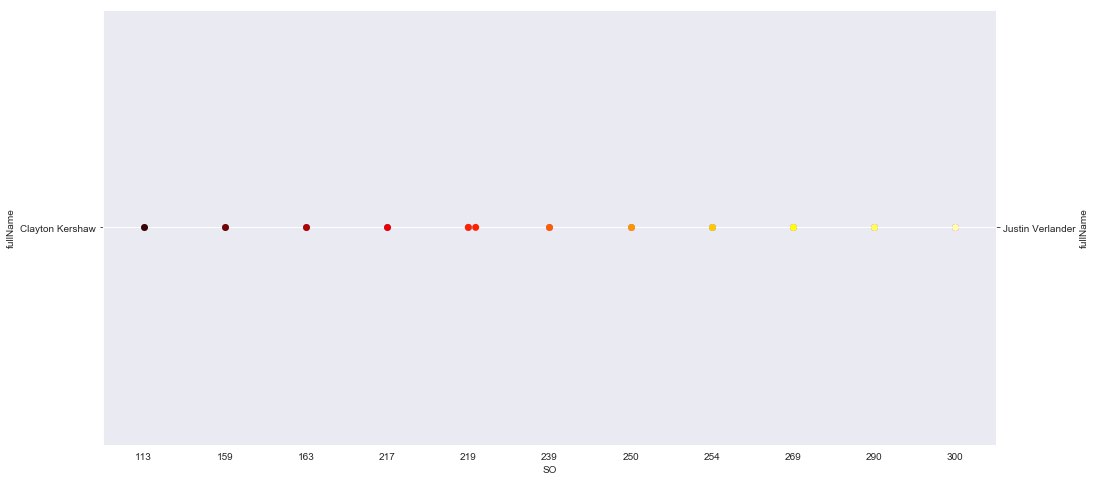

In [25]:
# plt.figure(figsize = (16, 8))
# # plt.subplot(2, 1, 1)
# fig, ax = plt.subplots(figsize = (16, 8))
# ax2 = ax.twinx()
# sns.swarmplot(x = "SO", y = "fullName", data = kershaw_stats, palette = "cool", size = 7, ax = ax, orient = "v");
# # plt.subplot(2, 1, 1)
# sns.swarmplot(x = "SO", y = "fullName", data = verlander_stats, palette= "hot", size = 7, ax = ax2, orient = "v");

In [14]:
teams = ["LAN", "MIL", "WAS", "NYA", "OAK", "HOU"]
best_teams = single_stint_df[single_stint_df["teamID"].isin(teams)].reset_index(drop = True)
best_teams.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
1,albaljo01,2008,1,NYA,AL,0,1,7,0,0,0,0,15,6,1,6,13,2,6,270.0,77.0,R,Jonathan Albaladejo,13.67,3.95,1.54,3.0
2,ayalalu01,2008,1,WAS,NL,2,10,81,0,0,0,9,86,48,9,24,50,25,53,205.0,74.0,R,Luis Ayala,75.67,5.71,1.45,3.0
3,backebr01,2008,1,HOU,NL,9,14,31,31,0,0,0,202,112,36,77,127,0,114,182.0,72.0,R,Brandon Backe,166.67,6.05,1.67,3.0
4,balesco01,2008,1,WAS,NL,3,7,15,15,0,0,0,92,49,12,28,50,0,53,190.0,76.0,R,Collin Balester,80.00,5.51,1.50,3.0


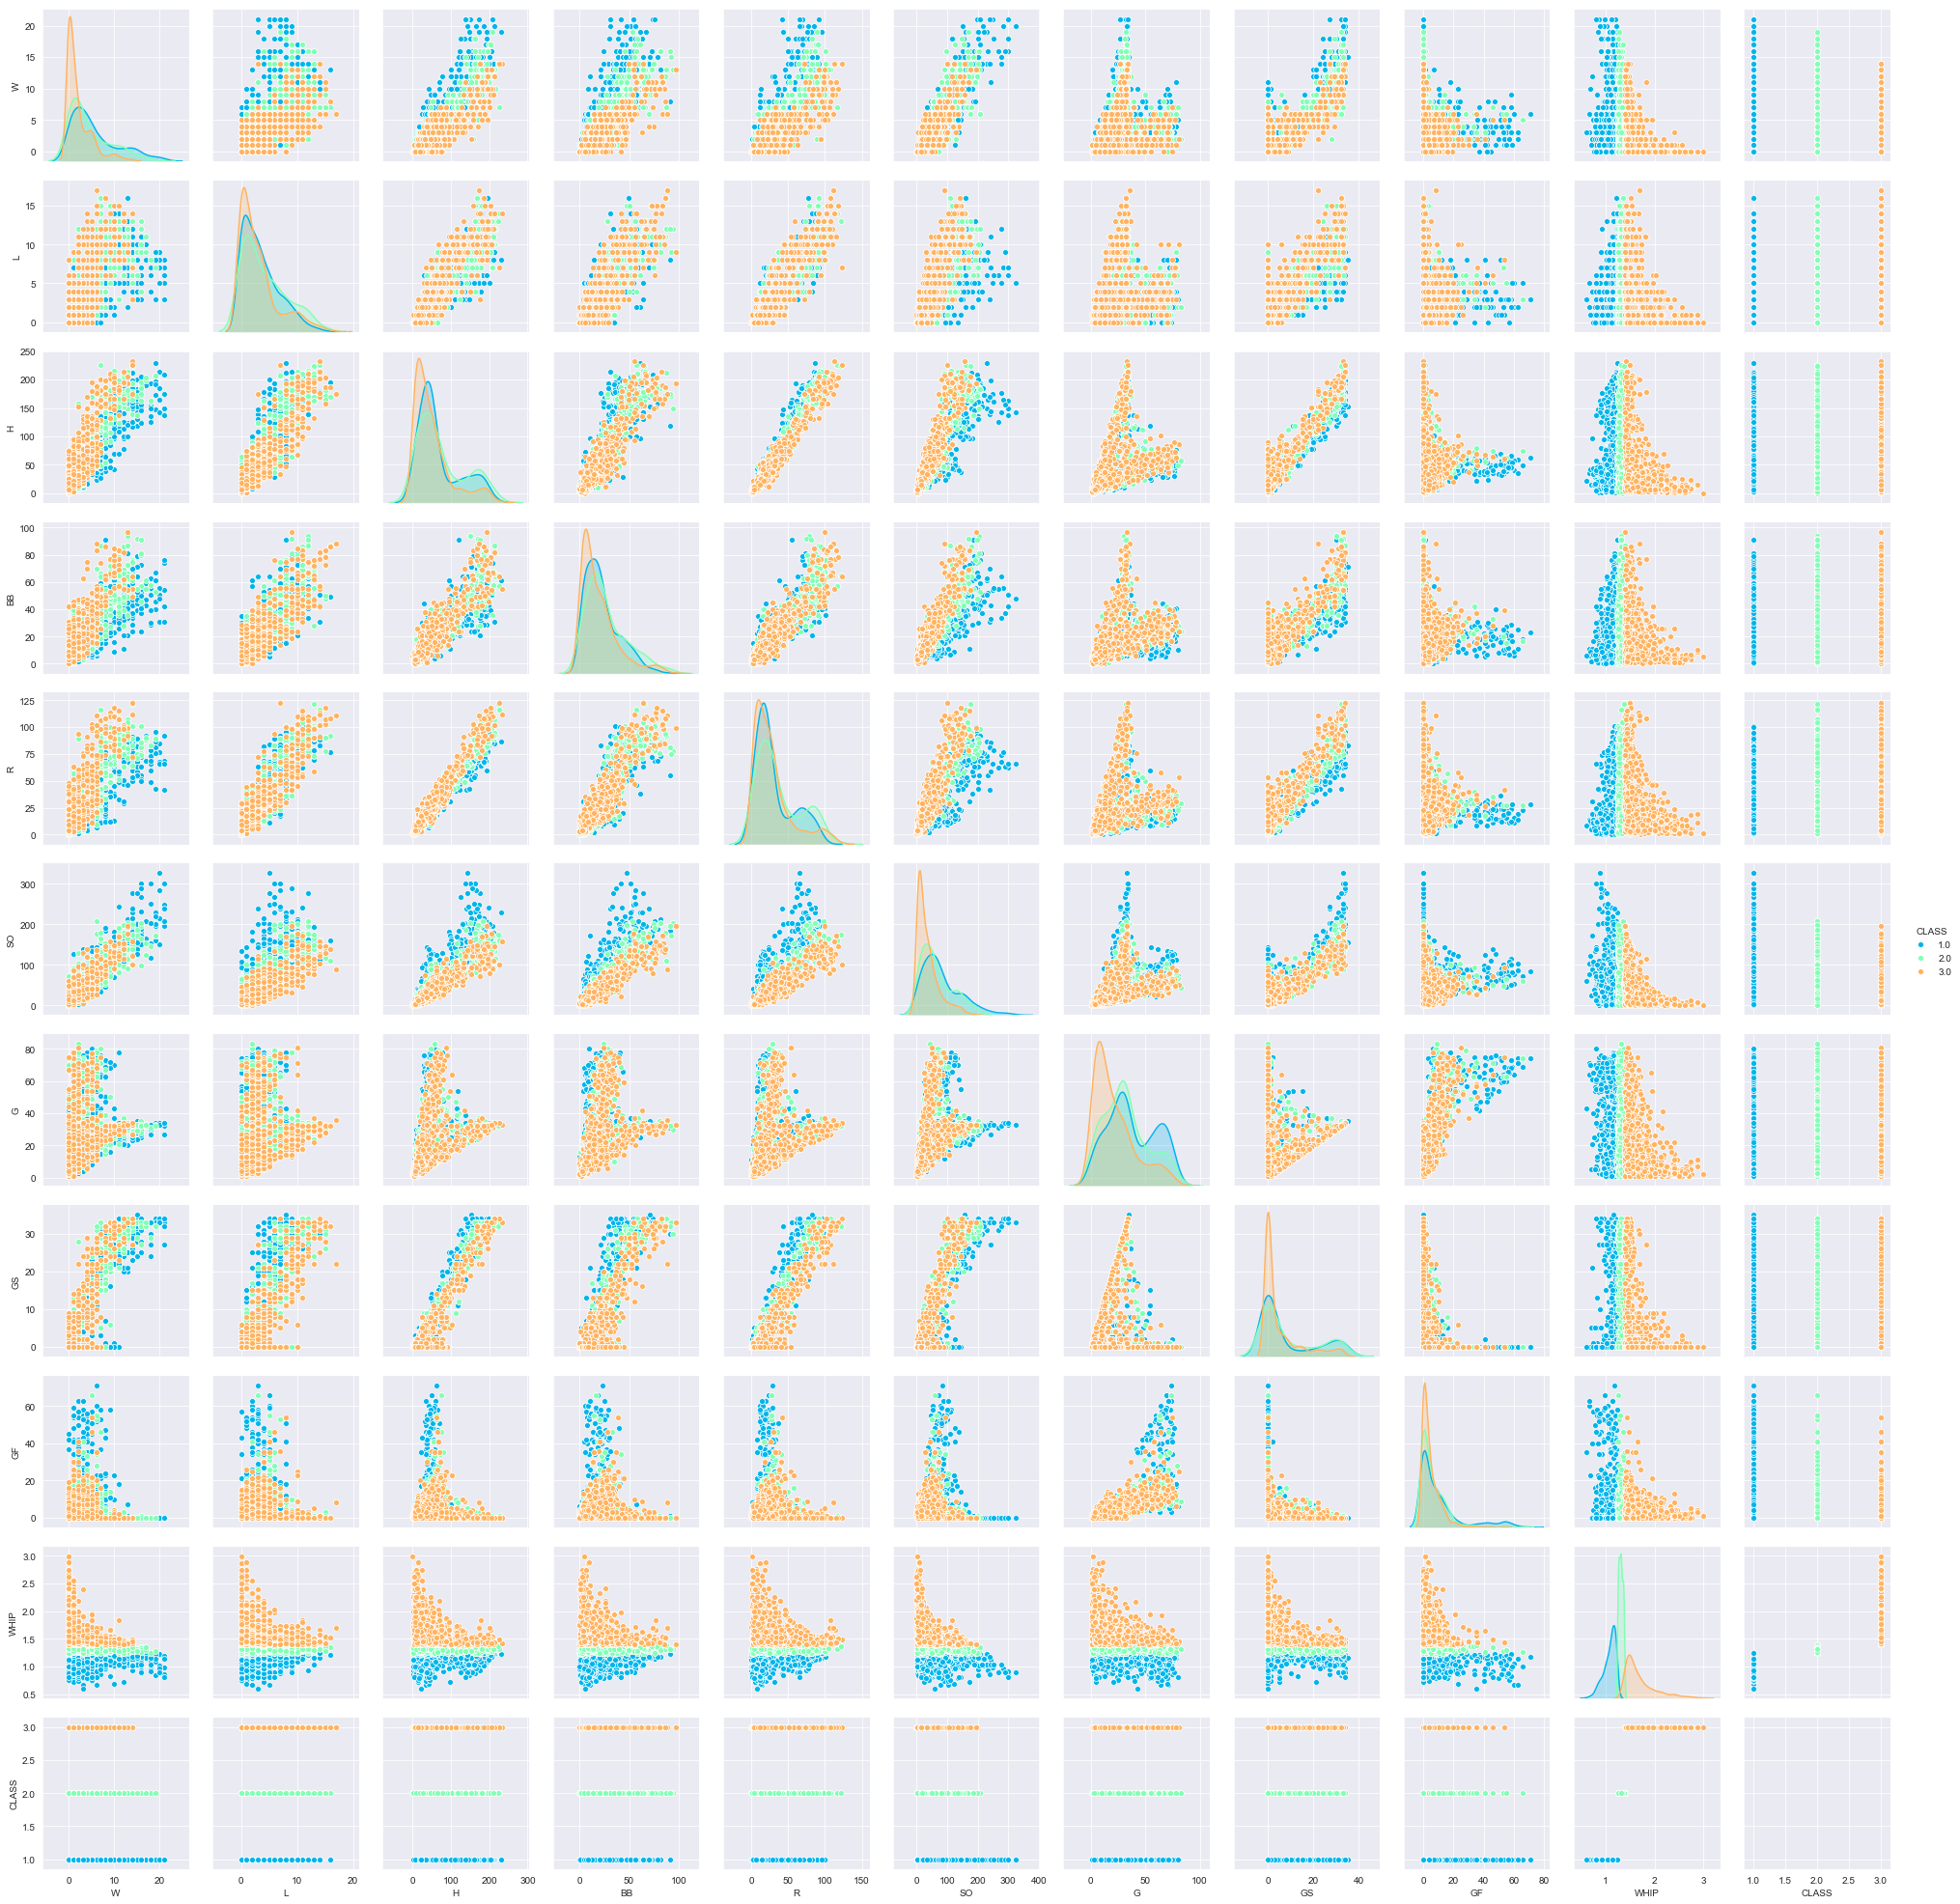

In [15]:
sns.pairplot(best_teams[["W", "L", "H", "BB", "R", "SO", "G", "GS", "GF",
                         "WHIP", "CLASS"]], hue = 'CLASS', palette = "rainbow");

In [16]:
pitchers = ["kershcl01", "cahiltr01", "sabatcc01", "verlaju01"]
player_perform = single_stint_df[single_stint_df["playerID"].isin(pitchers)].reset_index(drop = True)
player_perform.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,kershcl01,2008,1,LAN,NL,5,5,22,21,0,0,0,109,51,11,52,100,0,51,226.0,76.0,L,Clayton Kershaw,107.67,4.26,1.50,3.0
1,sabatcc01,2008,1,CLE,AL,17,10,35,35,10,5,0,223,76,19,59,251,0,85,300.0,78.0,L,CC Sabathia,253.00,2.70,1.11,1.0
2,verlaju01,2008,1,DET,AL,11,17,33,33,1,0,0,195,108,18,87,163,0,119,225.0,77.0,R,Justin Verlander,201.00,4.84,1.40,3.0
3,cahiltr01,2009,1,OAK,AL,10,13,32,32,0,0,0,185,92,27,72,90,0,99,230.0,76.0,R,Trevor Cahill,178.67,4.63,1.44,3.0
4,kershcl01,2009,1,LAN,NL,8,8,31,30,0,0,0,119,53,7,91,185,1,55,226.0,76.0,L,Clayton Kershaw,171.00,2.79,1.23,1.0


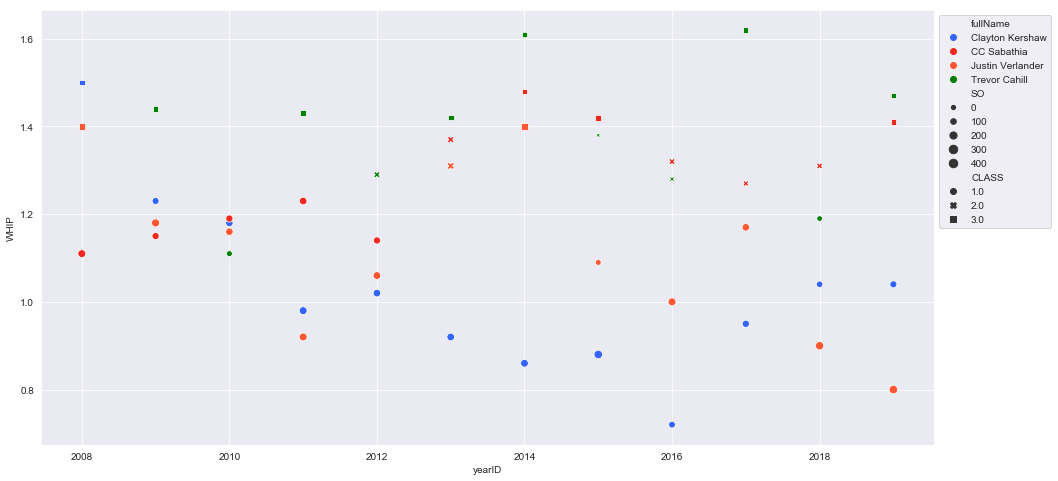

In [17]:
plt.figure(figsize = (16, 8))
sns.scatterplot(x = "yearID", y = "WHIP", data = player_perform, hue = "fullName", size = "SO", style = "CLASS")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [18]:
single_stint_df = pd.get_dummies(single_stint_df, prefix = ["throws"], columns = ["throws"], dtype = int)

In [19]:
single_stint_df.head(20)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,fullName,IP,ERA,WHIP,CLASS,throws_L,throws_R,throws_S
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,David Aardsma,48.67,5.55,1.73,3.0,0,1,0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,Jeremy Accardo,12.33,6.57,1.54,3.0,0,1,0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,Alfredo Aceves,30.00,2.40,1.17,1.0,0,1,0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,Manny Acosta,53.00,3.57,1.40,3.0,0,1,0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,Mike Adams,65.33,2.48,1.04,1.0,0,1,0
5,adenhni01,2008,1,LAA,AL,1,0,3,3,0,0,0,18,12,0,13,4,0,12,185.0,75.0,Nick Adenhart,12.00,9.00,2.58,3.0,0,1,0
6,adkinjo01,2008,1,CIN,NL,1,0,4,0,0,0,0,4,1,1,3,3,0,1,200.0,72.0,Jon Adkins,3.67,2.45,1.91,3.0,0,1,0
7,affelje01,2008,1,CIN,NL,1,1,74,0,0,0,0,78,29,9,25,80,20,36,225.0,76.0,Jeremy Affeldt,78.33,3.33,1.31,2.0,1,0,0
8,albaljo01,2008,1,NYA,AL,0,1,7,0,0,0,0,15,6,1,6,13,2,6,270.0,77.0,Jonathan Albaladejo,13.67,3.95,1.54,3.0,0,1,0
9,alberma01,2008,1,BAL,AL,3,3,28,3,0,0,0,43,19,4,22,26,5,21,225.0,73.0,Matt Albers,49.00,3.49,1.33,2.0,0,1,0


In [20]:
single_stint_df["CLASS"] = single_stint_df["CLASS"].astype("int64")

In [21]:
single_stint_df["throws_L"] = single_stint_df["throws_L"].astype("int64")
single_stint_df["throws_R"] = single_stint_df["throws_R"].astype("int64")
single_stint_df["throws_S"] = single_stint_df["throws_S"].astype("int64")
single_stint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7910 entries, 0 to 8194
Data columns (total 29 columns):
playerID    7910 non-null object
yearID      7910 non-null int64
stint       7910 non-null int64
teamID      7910 non-null object
lgID        7910 non-null object
W           7910 non-null int64
L           7910 non-null int64
G           7910 non-null int64
GS          7910 non-null int64
CG          7910 non-null int64
SHO         7910 non-null int64
SV          7910 non-null int64
H           7910 non-null int64
ER          7910 non-null int64
HR          7910 non-null int64
BB          7910 non-null int64
SO          7910 non-null int64
GF          7910 non-null int64
R           7910 non-null int64
weight      7910 non-null float64
height      7910 non-null float64
fullName    7910 non-null object
IP          7910 non-null float64
ERA         7910 non-null float64
WHIP        7910 non-null float64
CLASS       7910 non-null int64
throws_L    7910 non-null int64
throws_R    791

In [23]:
model_data_1 = single_stint_df.drop(columns = ["playerID", "teamID", "lgID",
                                               "stint", "fullName", "ERA"])
model_data_1.head()

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,IP,WHIP,CLASS,throws_L,throws_R,throws_S
0,2008,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,48.67,1.73,3,0,1,0
1,2008,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,12.33,1.54,3,0,1,0
2,2008,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,30.00,1.17,1,0,1,0
3,2008,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,53.00,1.40,3,0,1,0
4,2008,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,65.33,1.04,1,0,1,0


In [24]:
model_data_2 = model_data_1.drop(columns = ["yearID", "CLASS"])
model_data_2.head()

,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,IP,WHIP,throws_L,throws_R,throws_S
0,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,48.67,1.73,0,1,0
1,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,12.33,1.54,0,1,0
2,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,30.00,1.17,0,1,0
3,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,53.00,1.40,0,1,0
4,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,65.33,1.04,0,1,0


In [25]:
# Saving model data to csv to avoid running the previous cells when reopening the notebook.
model_data_1.to_csv("model_data_1.csv", index = False)

In [26]:
# Saving model data to csv to avoid running the previous cells when reopening the notebook.
model_data_2.to_csv("model_data_2.csv", index = False)

In [2]:
model_data_1 = pd.read_csv("model_data_1.csv")
model_data_1.head()

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,IP,WHIP,CLASS,throws_L,throws_R,throws_S
0,2008,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,48.67,1.73,3,0,1,0
1,2008,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,12.33,1.54,3,0,1,0
2,2008,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,30.00,1.17,1,0,1,0
3,2008,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,53.00,1.40,3,0,1,0
4,2008,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,65.33,1.04,1,0,1,0


In [3]:
model_data_2 = pd.read_csv("model_data_2.csv")
model_data_2.head()

,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,IP,WHIP,throws_L,throws_R,throws_S
0,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,48.67,1.73,0,1,0
1,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,12.33,1.54,0,1,0
2,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,30.00,1.17,0,1,0
3,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,53.00,1.40,0,1,0
4,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,65.33,1.04,0,1,0


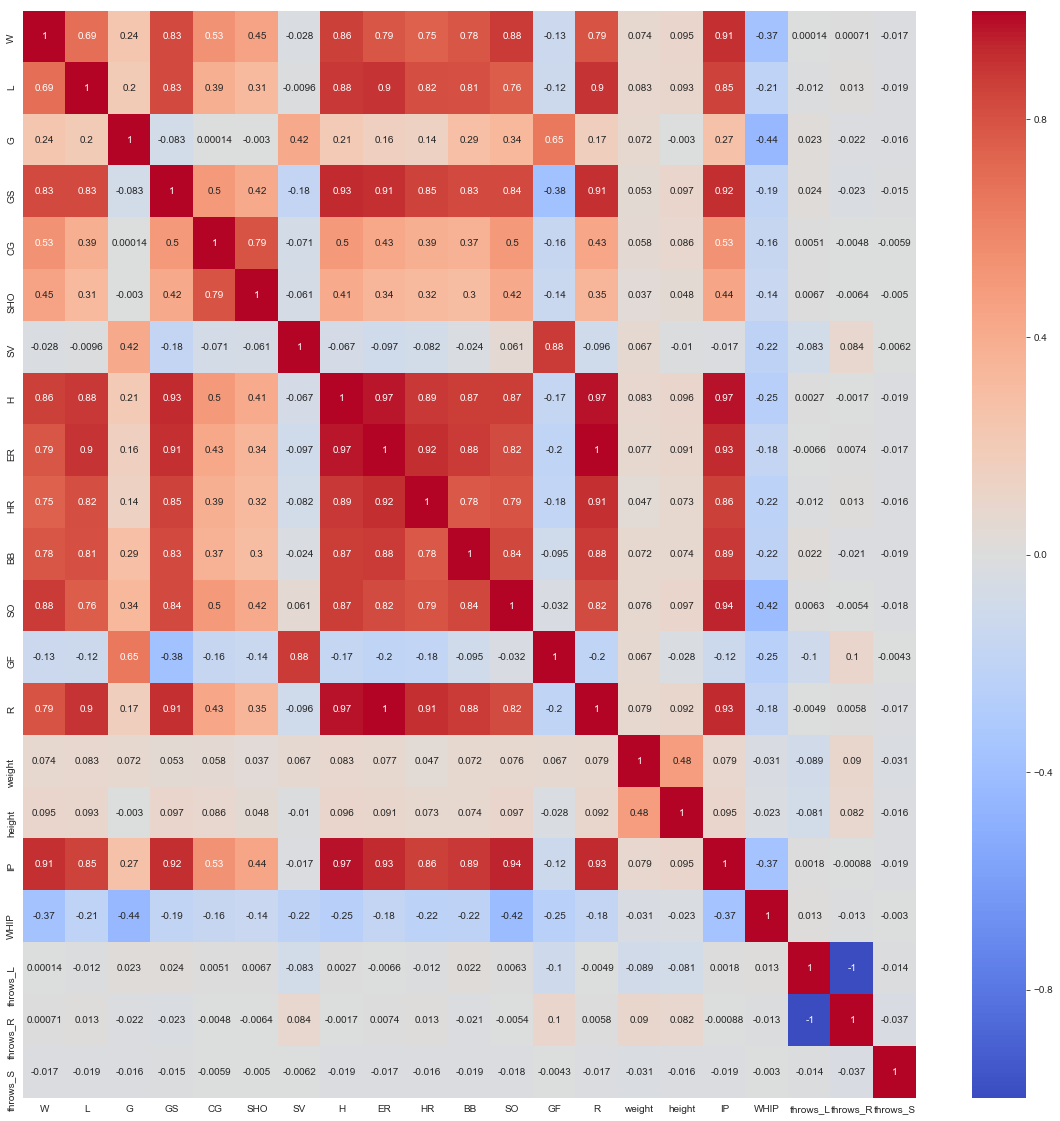

In [7]:
plt.figure(figsize = (20, 20))
sns.set_style("darkgrid")
sns.heatmap(model_data_2.corr(), center = 0, annot = True, cmap = "coolwarm")

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, accuracy_score, recall_score,
                             f1_score, classification_report, confusion_matrix)

In [9]:
# X_train = model_data_1[(model_data_1["yearID"] >= 2008) &
#                        (model_data_1["yearID"] <= 2018)].reset_index(drop = True)

# display(X_train.head())

# print(X_train.shape)

In [10]:
# X_test = model_data_1[model_data_1["yearID"] == 2019].reset_index(drop = True)

# display(X_test.head())

# print(X_test.shape)

In [11]:
# X_train.columns

In [12]:
# y_train = X_train.drop(columns = ['yearID', 'W', 'L', 'G', 'GS', 'CG',
#                                   'SHO', 'SV', 'H', 'ER', 'HR', 'BB',
#                                   'SO', 'GF', 'R', 'weight', 'height',
#                                   'IP', 'WHIP', 'throws_L', 'throws_R',
#                                   'throws_S' ])

# display(y_train.head())

# print(y_train.shape)

In [13]:
# y_test = X_test.drop(columns = ['yearID', 'W', 'L', 'G', 'GS', 'CG',
#                                   'SHO', 'SV', 'H', 'ER', 'HR', 'BB',
#                                   'SO', 'GF', 'R', 'weight', 'height',
#                                   'IP', 'WHIP', 'throws_L', 'throws_R',
#                                   'throws_S'])

# display(y_test.head())

# print(y_test.shape)

In [14]:
# Drop target from train and test sets
# X_train = X_train.drop(columns = "CLASS")
# X_train.head()

In [15]:
# X_test = X_test.drop(columns = "CLASS")
# X_test.head()

In [16]:
X = model_data_1.drop(columns = ["yearID", "CLASS"])
y = model_data_1["CLASS"]

In [18]:
display(X.head())

print(X.shape)

,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,IP,WHIP,throws_L,throws_R,throws_S
0,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,48.67,1.73,0,1,0
1,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,12.33,1.54,0,1,0
2,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,30.00,1.17,0,1,0
3,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,53.00,1.40,0,1,0
4,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,65.33,1.04,0,1,0


(7910, 21)


In [19]:
display(y.head())

print(y.shape)

0    3
1    3
2    1
3    3
4    1
Name: CLASS, dtype: int64

(7910,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [21]:
# Check to see if data needs to be rescaled.
model_data_1.describe()

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,IP,WHIP,CLASS,throws_L,throws_R,throws_S
count,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000
mean,2013.718205,3.675095,3.669027,29.672819,7.357269,0.167889,0.075980,1.867257,63.810872,29.902908,7.761820,23.060051,56.194564,7.105815,32.375980,214.227939,74.551580,65.559870,1.442154,2.175474,0.274336,0.725158,0.000506
std,3.482574,4.247153,3.727599,21.354563,11.184113,0.644088,0.343525,6.740391,57.548611,26.336414,7.490925,19.056286,52.503738,10.979518,28.462813,21.521874,2.167195,59.007316,0.355591,0.861245,0.446207,0.446463,0.022483
min,2008.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,66.000000,1.330000,0.570000,1.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,21.000000,11.000000,2.000000,8.000000,16.000000,0.000000,12.000000,200.000000,73.000000,20.082500,1.210000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,2.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,45.000000,21.000000,5.000000,18.000000,42.000000,3.000000,23.000000,215.000000,75.000000,50.000000,1.380000,2.000000,0.000000,1.000000,0.000000
75%,2017.000000,5.000000,6.000000,43.000000,12.000000,0.000000,0.000000,0.000000,83.000000,41.000000,11.000000,32.000000,76.000000,9.000000,44.000000,225.000000,76.000000,81.000000,1.600000,3.000000,1.000000,1.000000,0.000000
max,2019.000000,24.000000,19.000000,92.000000,35.000000,11.000000,6.000000,62.000000,262.000000,121.000000,46.000000,105.000000,326.000000,71.000000,129.000000,315.000000,83.000000,253.000000,2.990000,3.000000,1.000000,1.000000,1.000000


In [22]:
scaler = StandardScaler()

# Transforming data
train_data_scaled = scaler.fit_transform(X_train)
test_data_scaled = scaler.transform(X_test)

# Back into Dataframe
scaled_train_df = pd.DataFrame(train_data_scaled, columns= X_train.columns)
scaled_train_df.head()

C:\Users\teach\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\teach\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\teach\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,IP,WHIP,throws_L,throws_R,throws_S
0,-0.863883,-0.445856,-1.106531,-0.129226,-0.263681,-0.220701,-0.27285,-0.518987,-0.228255,-0.504290,-0.420749,-0.855770,-0.648089,-0.157663,-1.124469,-0.718789,-0.690497,1.525878,-0.617627,0.618408,-0.022494
1,-0.395695,0.355119,-0.680147,0.048632,-0.263681,-0.220701,-0.27285,-0.381098,-0.115103,0.158121,0.151821,-0.170440,-0.460673,-0.192551,0.506549,-0.256582,-0.432733,0.714377,-0.617627,0.618408,-0.022494
2,-0.863883,-0.979840,-1.248659,-0.662798,-0.263681,-0.220701,-0.27285,-1.036075,-1.058031,-0.901737,-1.097423,-1.008065,-0.554381,-1.064734,-0.425461,-0.256582,-1.066130,3.176862,-0.617627,0.618408,-0.022494
3,2.881622,1.957070,0.125244,2.182922,1.235987,2.625381,-0.27285,2.238811,1.129561,1.085497,1.296960,3.122949,-0.648089,1.516928,1.205556,0.667831,2.588305,-0.964590,1.619101,-1.617056,-0.022494
4,-0.863883,-0.712848,-0.727523,-0.662798,-0.263681,-0.220701,-0.27285,-0.674114,-0.643143,-0.636772,-1.097423,-0.741548,0.382699,-0.680973,2.370568,1.130038,-0.847543,0.882274,-0.617627,0.618408,-0.022494


In [23]:
LR_clf = LogisticRegression(random_state = 123, multi_class = "multinomial",
                            solver = "newton-cg", C = 1e12)

LR_clf.fit(train_data_scaled, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [25]:
# Predictions
LR_train_preds = LR_clf.predict(train_data_scaled)
LR_test_preds = LR_clf.predict(test_data_scaled)

train_acc = accuracy_score(y_train, LR_train_preds)
test_acc = accuracy_score(y_test, LR_test_preds)

print("Train Accuracy: {:.4}%".format(train_acc * 100))
print("Test Accuracy: {:.4}%".format(test_acc * 100))

Train Accuracy: 100.0%
Test Accuracy: 100.0%


In [29]:
# def print_metrics(labels, preds):
#     print("Precision Score: {}".format(precision_score(labels, preds)))
#     print("Recall Score: {}".format(recall_score(labels, preds)))
#     print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
#     print("F1 Score: {}".format(f1_score(labels, preds)))
    
# print_metrics(y_test, LR_test_preds)

In [30]:
print(classification_report(y_test, LR_test_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       593
           2       1.00      1.00      1.00       454
           3       1.00      1.00      1.00       931

   micro avg       1.00      1.00      1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978



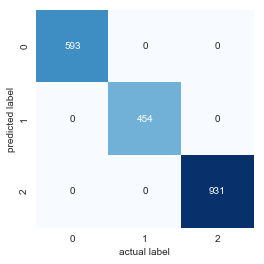

In [37]:
con_mat = confusion_matrix(y_test, LR_test_preds)
sns.heatmap(con_mat.T, square=True, annot=True, fmt='d', cbar=False, cmap = "Blues")
plt.xlabel('actual label')
plt.ylabel('predicted label');